In [1]:
# %matplotlib widget

import os
import numpy as np
import pandas as pd
import itertools as it
from glob import glob
import matplotlib.pyplot as plt
from sbpy.calib import Sun
from astropy import units as u
from astropy.io import fits

from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable
from astropy.visualization import ImageNormalize, PercentileInterval, AsinhStretch

from lvmdrp.core.constants import LVM_UNAM_URL
from lvmdrp.utils.examples import fetch_example_data, get_frames_metadata, fix_lamps_metadata, get_masters_metadata

from lvmdrp.core import rss, image, spectrum1d
from lvmdrp.functions import imageMethod, rssMethod, fluxCalMethod

plt.style.use("seaborn-v0_8-talk")

In [2]:
# define input data directory
data_path = os.path.abspath(os.path.join("..", "data"))

# let's create the output directory
output_path = "./data"
os.makedirs(output_path, exist_ok=True)

# create processed frames path template
out_main_path = os.path.join(output_path, "lvm-{kind}-{camera}-{expnum}.fits")
out_calib_path = os.path.join(output_path, "lvm-{mjd}-{kind}-{camera}-{exptime}.fits")
out_arc_path = os.path.join(output_path, "lvm-{mjd}-{kind}-{camera}-{lamps}.fits")

# overwrite or not
OVERWRITE = True

In [3]:
# extract metadata
frames_table = get_frames_metadata(path=os.path.join(data_path, "lco_com"), ignore_cache=False).to_pandas()
frames_table = frames_table.loc[~frames_table.mjd.isin([60008,60009,60037,60038])]
# fix arc lamps metadata
fix_lamps_metadata(metadata=frames_table, lamp_names="argon neon ldls hgne xenon krypton".split())

[INFO]: loading cached metadata from '/home/mejia/Research/UNAM/lvm-drp/lvmdrp/examples/data/lco_com/frames_table.pkl'


     mjd  kind camera lamps                                path
2  super  xarc     b1  neon  ./data/lvm-super-xarc-b1-neon.fits
8  super  xarc     b2  neon  ./data/lvm-super-xarc-b2-neon.fits
3  super  xarc     b3  neon  ./data/lvm-super-xarc-b3-neon.fits
4  super  xarc     r1  neon  ./data/lvm-super-xarc-r1-neon.fits
0  super  xarc     r2  neon  ./data/lvm-super-xarc-r2-neon.fits
6  super  xarc     r3  neon  ./data/lvm-super-xarc-r3-neon.fits
1  super  xarc     z1  neon  ./data/lvm-super-xarc-z1-neon.fits
7  super  xarc     z2  neon  ./data/lvm-super-xarc-z2-neon.fits
5  super  xarc     z3  neon  ./data/lvm-super-xarc-z3-neon.fits
mjd                                    super
kind                                    xarc
camera                                    b1
lamps                                   neon
path      ./data/lvm-super-xarc-b1-neon.fits
Name: 2, dtype: object
[INFO]: reading guess lines from '../../python/lvmdrp/etc/lvm-neon_nist_b1.txt'
[INFO]: going to use fiber 319 a

measuring arc lines upwards from ref_fiber = 319: 100%|#################################################| 319/319 [01:51<00:00,  2.86fiber/s]
measuring arc lines downwards from ref_fiber = 319: 100%|###############################################| 318/318 [01:44<00:00,  3.03fiber/s]


[INFO]: smoothing FWHM of guess lines along cross-dispersion axis using 3-deg polynomials
[INFO]: fitting wavelength solutions using 3-deg polynomials
[INFO]: finished wavelength fitting with median RMS = 3.15857 AA (5.41514 pix)
[INFO]: fitting LSF solutions using 3-deg polynomials
[INFO]: finished LSF fitting with median RMS = 0.357347 AA (0.604196 pix)


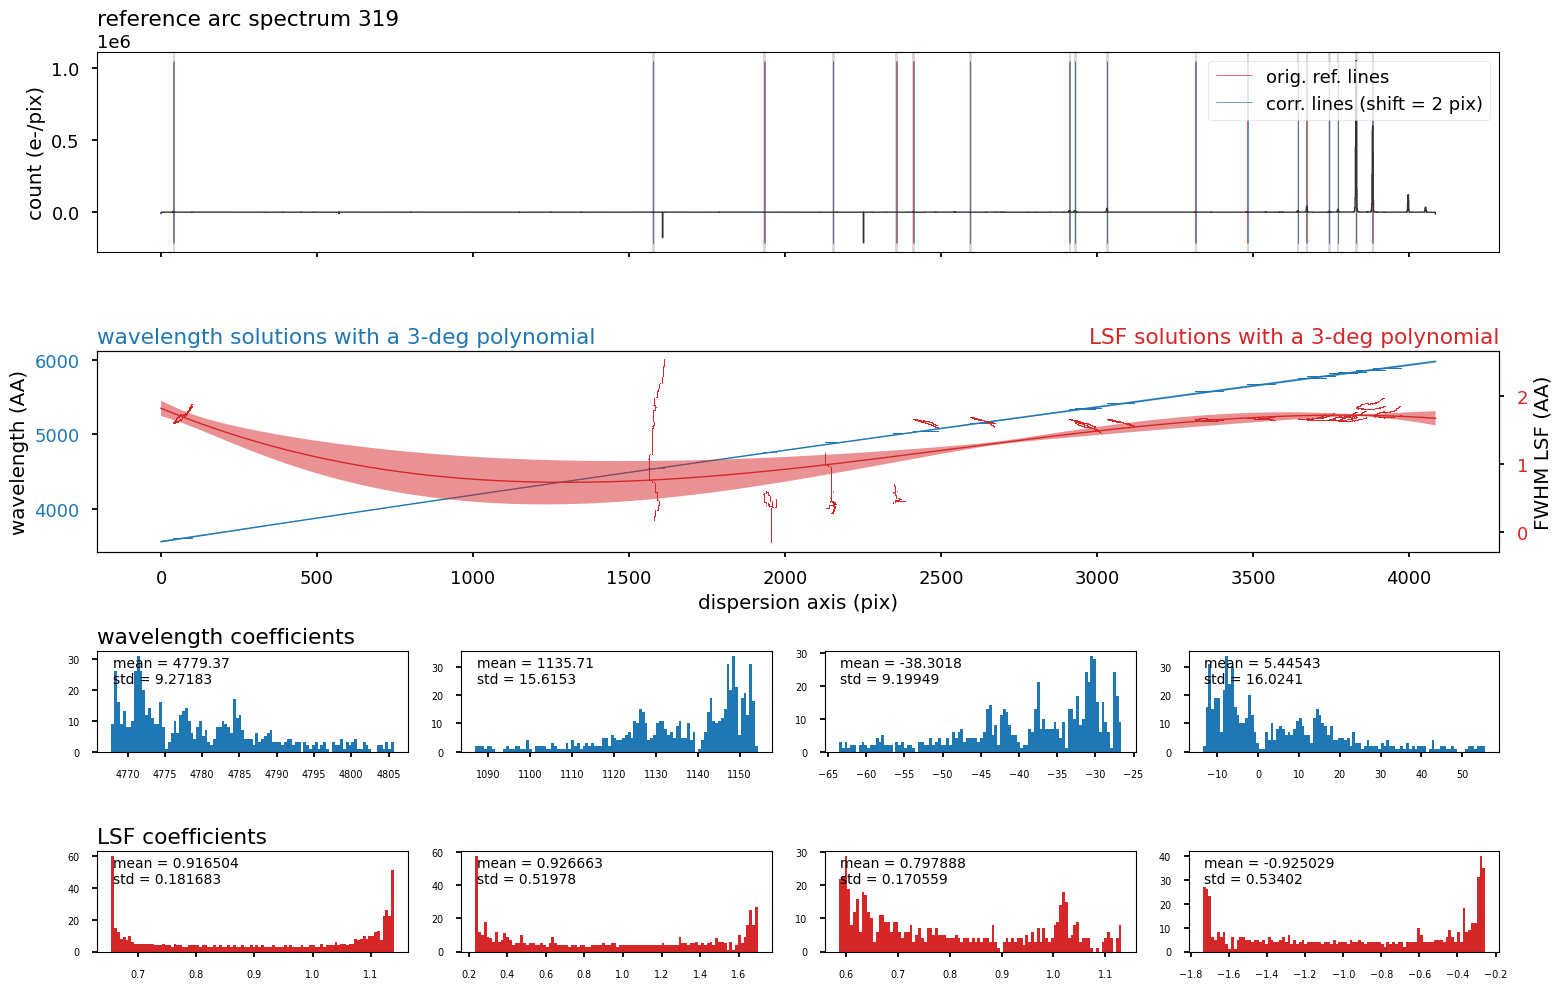

[INFO]: updating header and writing wavelength/LSF to './data/lvm-super-wave-b1-neon.fits' and './data/lvm-super-lsf-b1-neon.fits'
mjd                                    super
kind                                    xarc
camera                                    b2
lamps                                   neon
path      ./data/lvm-super-xarc-b2-neon.fits
Name: 8, dtype: object
[INFO]: reading guess lines from '../../python/lvmdrp/etc/lvm-neon_nist_b1.txt'
[INFO]: going to use fiber 319 as reference
[INFO]: number of guess lines in file 19 percentage masked  5.26316 %
[INFO]: going to use 18 guess lines
[INFO]: reading arc from './data/lvm-super-xarc-b2-neon.fits'
[INFO]: calculating shift in guess lines using CC
[INFO]: maximum CC shift = 39 pix
[INFO]: measuring arc lines for each fiber from reference fiber 319, flux_min = 10.0, fwhm_max = 5.0 and relative flux limits [0.001, 100.0]


measuring arc lines upwards from ref_fiber = 319: 100%|#################################################| 319/319 [00:32<00:00,  9.87fiber/s]
measuring arc lines downwards from ref_fiber = 319: 100%|###############################################| 318/318 [00:33<00:00,  9.35fiber/s]


[INFO]: smoothing FWHM of guess lines along cross-dispersion axis using 3-deg polynomials
[INFO]: fitting wavelength solutions using 3-deg polynomials
[INFO]: finished wavelength fitting with median RMS = 0.163052 AA (0.276602 pix)
[INFO]: fitting LSF solutions using 3-deg polynomials
[INFO]: finished LSF fitting with median RMS = 0.11148 AA (0.185039 pix)


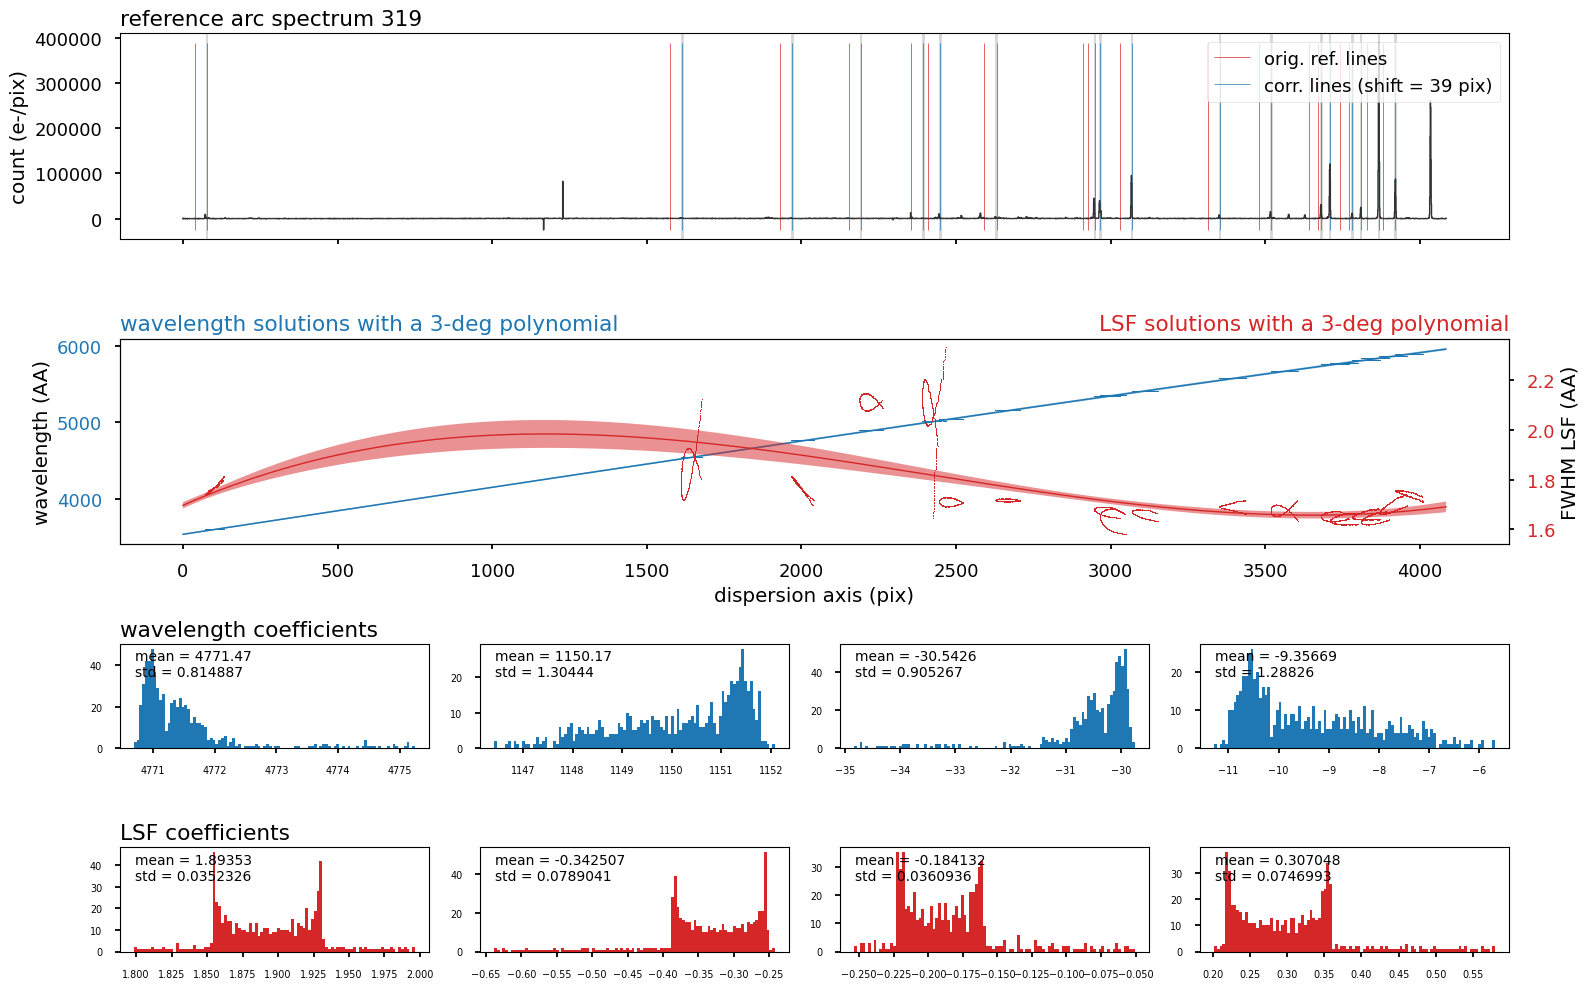

[INFO]: updating header and writing wavelength/LSF to './data/lvm-super-wave-b2-neon.fits' and './data/lvm-super-lsf-b2-neon.fits'
mjd                                    super
kind                                    xarc
camera                                    b3
lamps                                   neon
path      ./data/lvm-super-xarc-b3-neon.fits
Name: 3, dtype: object
[INFO]: reading guess lines from '../../python/lvmdrp/etc/lvm-neon_nist_b1.txt'
[INFO]: going to use fiber 319 as reference
[INFO]: number of guess lines in file 19 percentage masked  5.26316 %
[INFO]: going to use 18 guess lines
[INFO]: reading arc from './data/lvm-super-xarc-b3-neon.fits'
[INFO]: calculating shift in guess lines using CC
[INFO]: maximum CC shift = 37 pix
[INFO]: measuring arc lines for each fiber from reference fiber 319, flux_min = 10.0, fwhm_max = 5.0 and relative flux limits [0.001, 100.0]


measuring arc lines upwards from ref_fiber = 319: 100%|#################################################| 319/319 [01:59<00:00,  2.66fiber/s]
measuring arc lines downwards from ref_fiber = 319: 100%|###############################################| 318/318 [01:57<00:00,  2.70fiber/s]


[INFO]: smoothing FWHM of guess lines along cross-dispersion axis using 3-deg polynomials
[INFO]: fitting wavelength solutions using 3-deg polynomials
[INFO]: finished wavelength fitting with median RMS = 4.14169 AA (6.96359 pix)
[INFO]: fitting LSF solutions using 3-deg polynomials
[INFO]: finished LSF fitting with median RMS = 0.160455 AA (0.27674 pix)


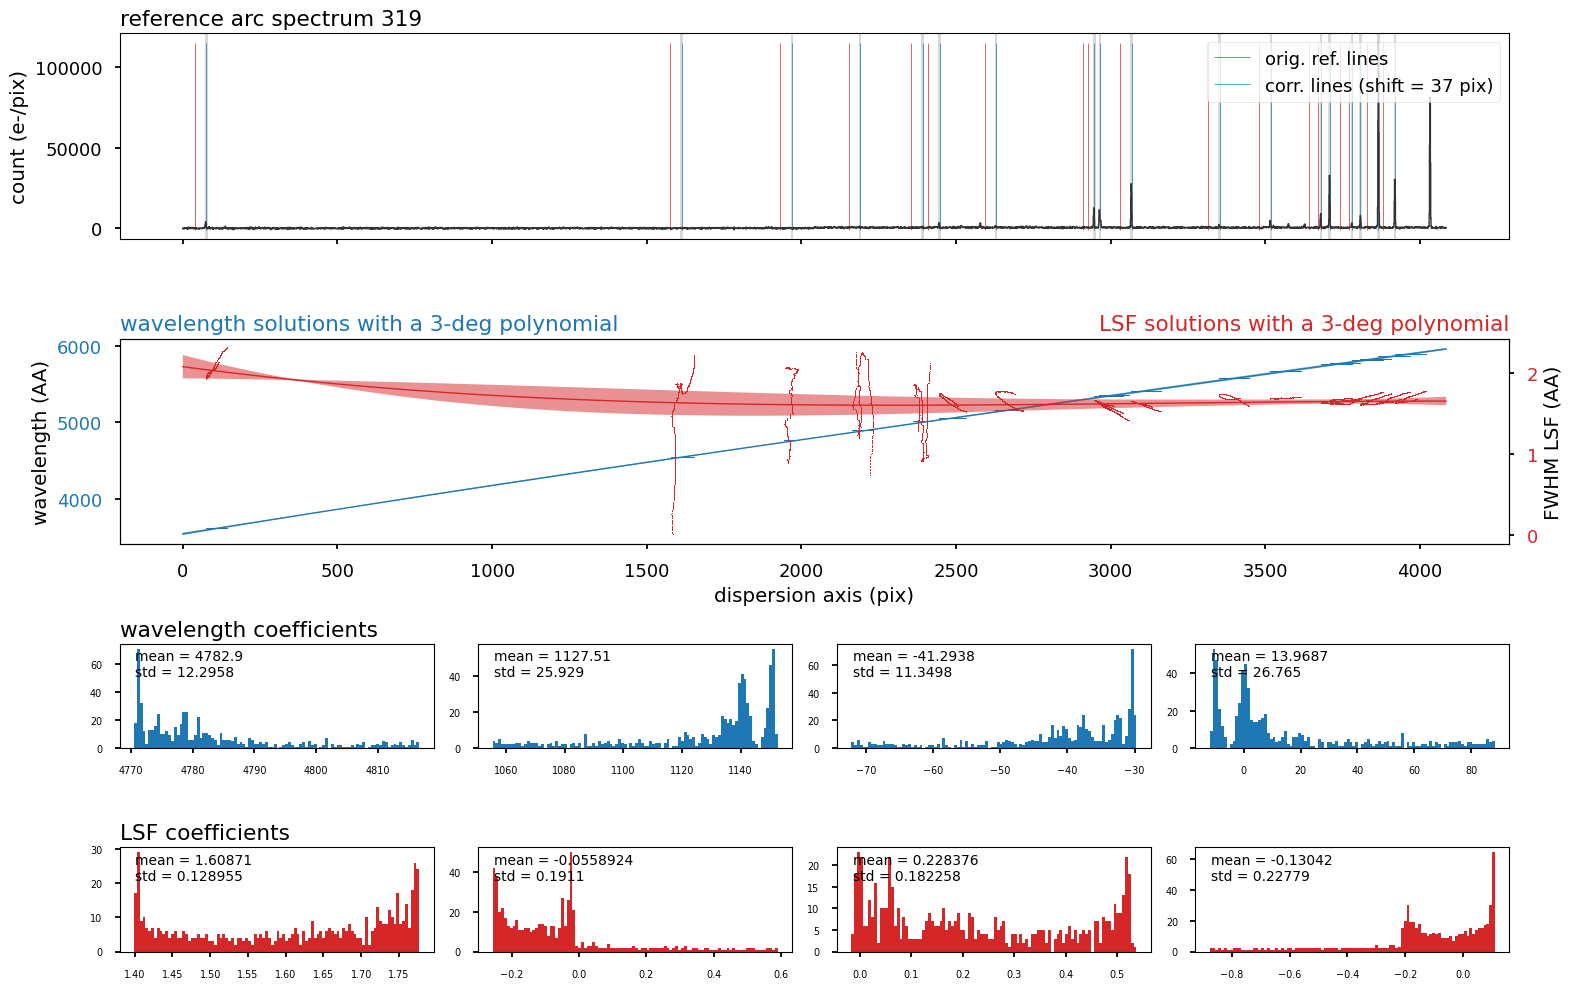

[INFO]: updating header and writing wavelength/LSF to './data/lvm-super-wave-b3-neon.fits' and './data/lvm-super-lsf-b3-neon.fits'
mjd                                    super
kind                                    xarc
camera                                    r1
lamps                                   neon
path      ./data/lvm-super-xarc-r1-neon.fits
Name: 4, dtype: object
[INFO]: reading guess lines from '../../python/lvmdrp/etc/lvm-neon_nist_r1.txt'
[INFO]: going to use fiber 319 as reference
[INFO]: number of guess lines in file 31 percentage masked  6.45161 %
[INFO]: going to use 29 guess lines
[INFO]: reading arc from './data/lvm-super-xarc-r1-neon.fits'
[INFO]: calculating shift in guess lines using CC
[INFO]: maximum CC shift = 2 pix
[INFO]: measuring arc lines for each fiber from reference fiber 319, flux_min = 10.0, fwhm_max = 5.0 and relative flux limits [0.001, 100.0]


measuring arc lines upwards from ref_fiber = 319: 100%|#################################################| 319/319 [01:27<00:00,  3.66fiber/s]
measuring arc lines downwards from ref_fiber = 319: 100%|###############################################| 318/318 [00:46<00:00,  6.78fiber/s]


[INFO]: smoothing FWHM of guess lines along cross-dispersion axis using 3-deg polynomials
[INFO]: fitting wavelength solutions using 3-deg polynomials
[WARNING]: fiber 0 has all lines masked
[WARNING]: fiber 1 has all lines masked
[WARNING]: fiber 2 has all lines masked
[WARNING]: fiber 3 has all lines masked
[WARNING]: fiber 4 has all lines masked
[WARNING]: fiber 5 has all lines masked
[WARNING]: fiber 6 has all lines masked
[WARNING]: fiber 7 has all lines masked
[WARNING]: fiber 8 has all lines masked
[WARNING]: fiber 9 has all lines masked
[WARNING]: fiber 10 has all lines masked
[WARNING]: fiber 11 has all lines masked
[WARNING]: fiber 12 has all lines masked
[WARNING]: fiber 13 has all lines masked
[WARNING]: fiber 14 has all lines masked
[WARNING]: fiber 15 has all lines masked
[WARNING]: fiber 16 has all lines masked
[WARNING]: fiber 17 has all lines masked
[WARNING]: fiber 18 has all lines masked
[WARNING]: fiber 19 has all lines masked
[WARNING]: fiber 20 has all lines maske

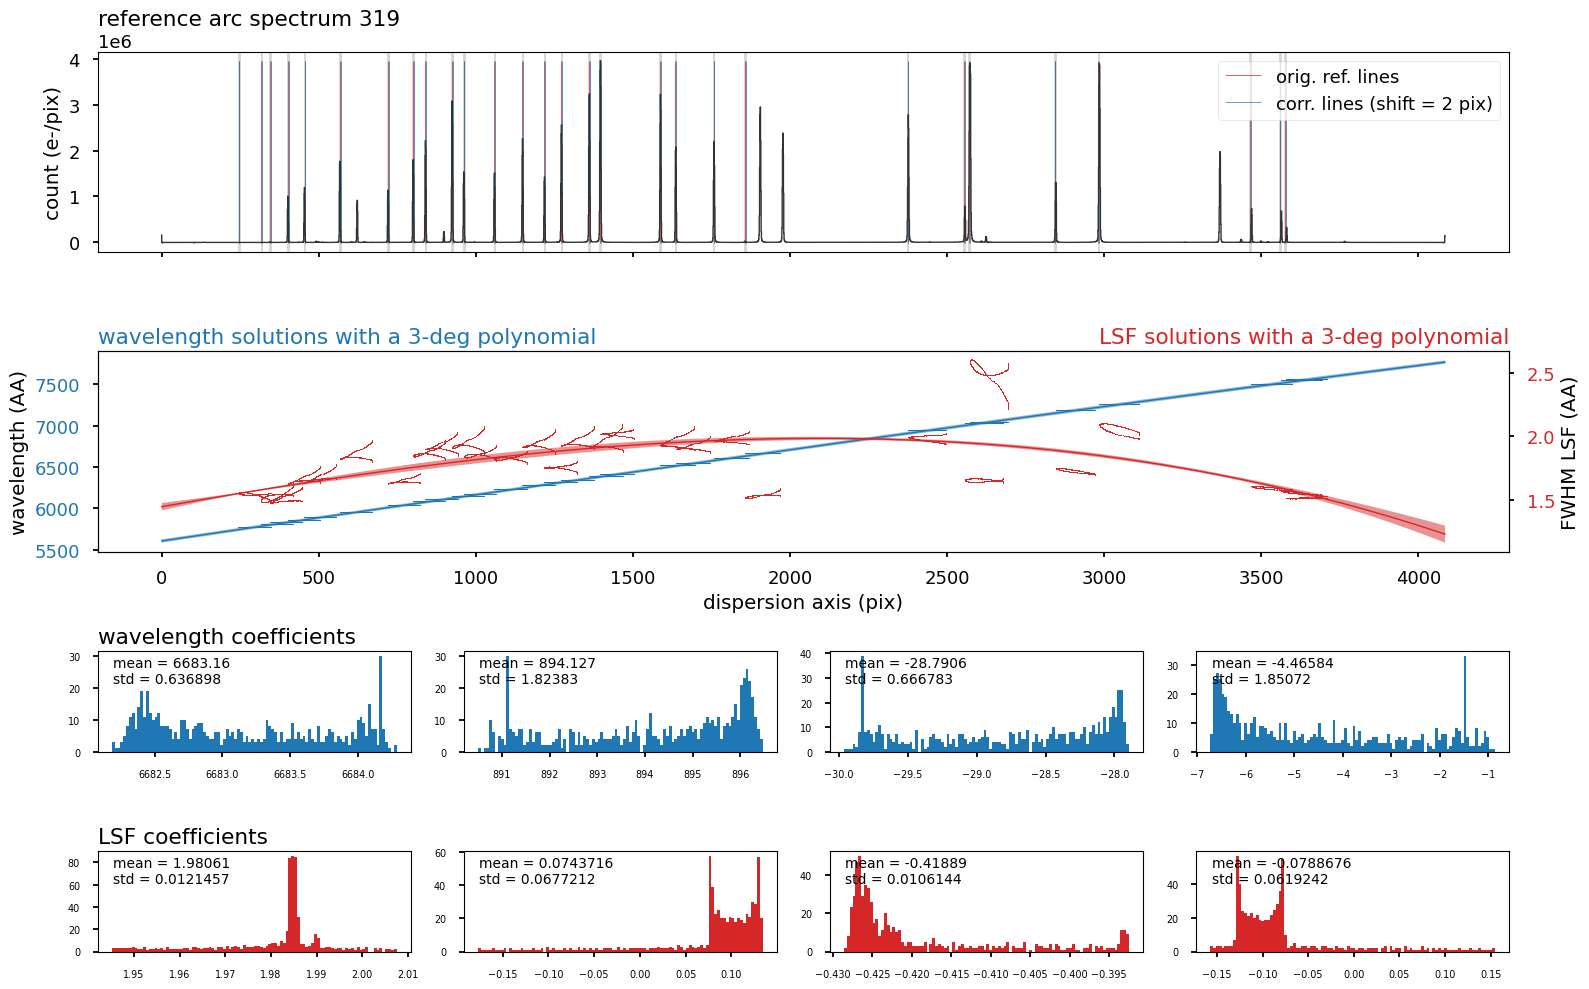

[INFO]: updating header and writing wavelength/LSF to './data/lvm-super-wave-r1-neon.fits' and './data/lvm-super-lsf-r1-neon.fits'
mjd                                    super
kind                                    xarc
camera                                    r2
lamps                                   neon
path      ./data/lvm-super-xarc-r2-neon.fits
Name: 0, dtype: object
[INFO]: reading guess lines from '../../python/lvmdrp/etc/lvm-neon_nist_r1.txt'
[INFO]: going to use fiber 319 as reference
[INFO]: number of guess lines in file 31 percentage masked  6.45161 %
[INFO]: going to use 29 guess lines
[INFO]: reading arc from './data/lvm-super-xarc-r2-neon.fits'
[INFO]: calculating shift in guess lines using CC
[INFO]: maximum CC shift = 7 pix
[INFO]: measuring arc lines for each fiber from reference fiber 319, flux_min = 10.0, fwhm_max = 5.0 and relative flux limits [0.001, 100.0]


measuring arc lines upwards from ref_fiber = 319: 100%|#################################################| 319/319 [00:18<00:00, 17.14fiber/s]
measuring arc lines downwards from ref_fiber = 319: 100%|###############################################| 318/318 [00:20<00:00, 15.49fiber/s]


[INFO]: smoothing FWHM of guess lines along cross-dispersion axis using 3-deg polynomials
[INFO]: fitting wavelength solutions using 3-deg polynomials
[INFO]: finished wavelength fitting with median RMS = 0.228215 AA (0.432465 pix)
[INFO]: fitting LSF solutions using 3-deg polynomials
[INFO]: finished LSF fitting with median RMS = 0.20841 AA (0.394441 pix)


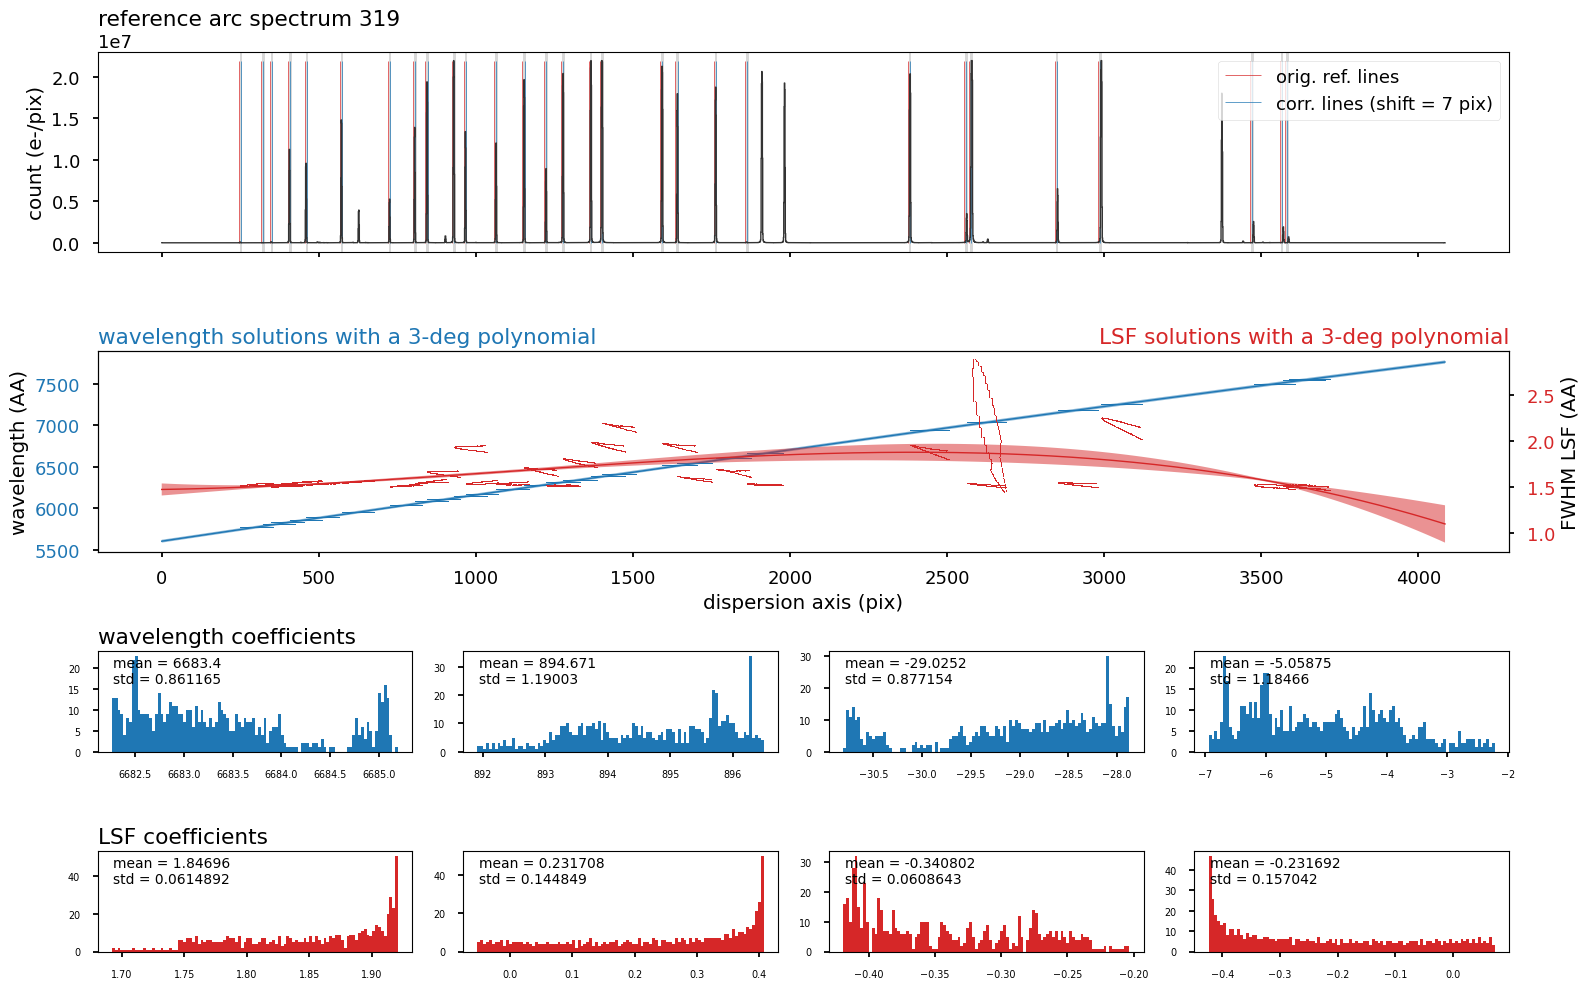

[INFO]: updating header and writing wavelength/LSF to './data/lvm-super-wave-r2-neon.fits' and './data/lvm-super-lsf-r2-neon.fits'
mjd                                    super
kind                                    xarc
camera                                    r3
lamps                                   neon
path      ./data/lvm-super-xarc-r3-neon.fits
Name: 6, dtype: object
[INFO]: reading guess lines from '../../python/lvmdrp/etc/lvm-neon_nist_r1.txt'
[INFO]: going to use fiber 319 as reference
[INFO]: number of guess lines in file 31 percentage masked  6.45161 %
[INFO]: going to use 29 guess lines
[INFO]: reading arc from './data/lvm-super-xarc-r3-neon.fits'
[INFO]: calculating shift in guess lines using CC
[INFO]: maximum CC shift = -6 pix
[INFO]: measuring arc lines for each fiber from reference fiber 319, flux_min = 10.0, fwhm_max = 5.0 and relative flux limits [0.001, 100.0]


measuring arc lines upwards from ref_fiber = 319: 100%|#################################################| 319/319 [00:20<00:00, 15.36fiber/s]
measuring arc lines downwards from ref_fiber = 319: 100%|###############################################| 318/318 [00:19<00:00, 15.91fiber/s]


[INFO]: smoothing FWHM of guess lines along cross-dispersion axis using 3-deg polynomials
[INFO]: fitting wavelength solutions using 3-deg polynomials
[INFO]: finished wavelength fitting with median RMS = 0.134705 AA (0.254539 pix)
[INFO]: fitting LSF solutions using 3-deg polynomials
[INFO]: finished LSF fitting with median RMS = 0.237162 AA (0.443342 pix)


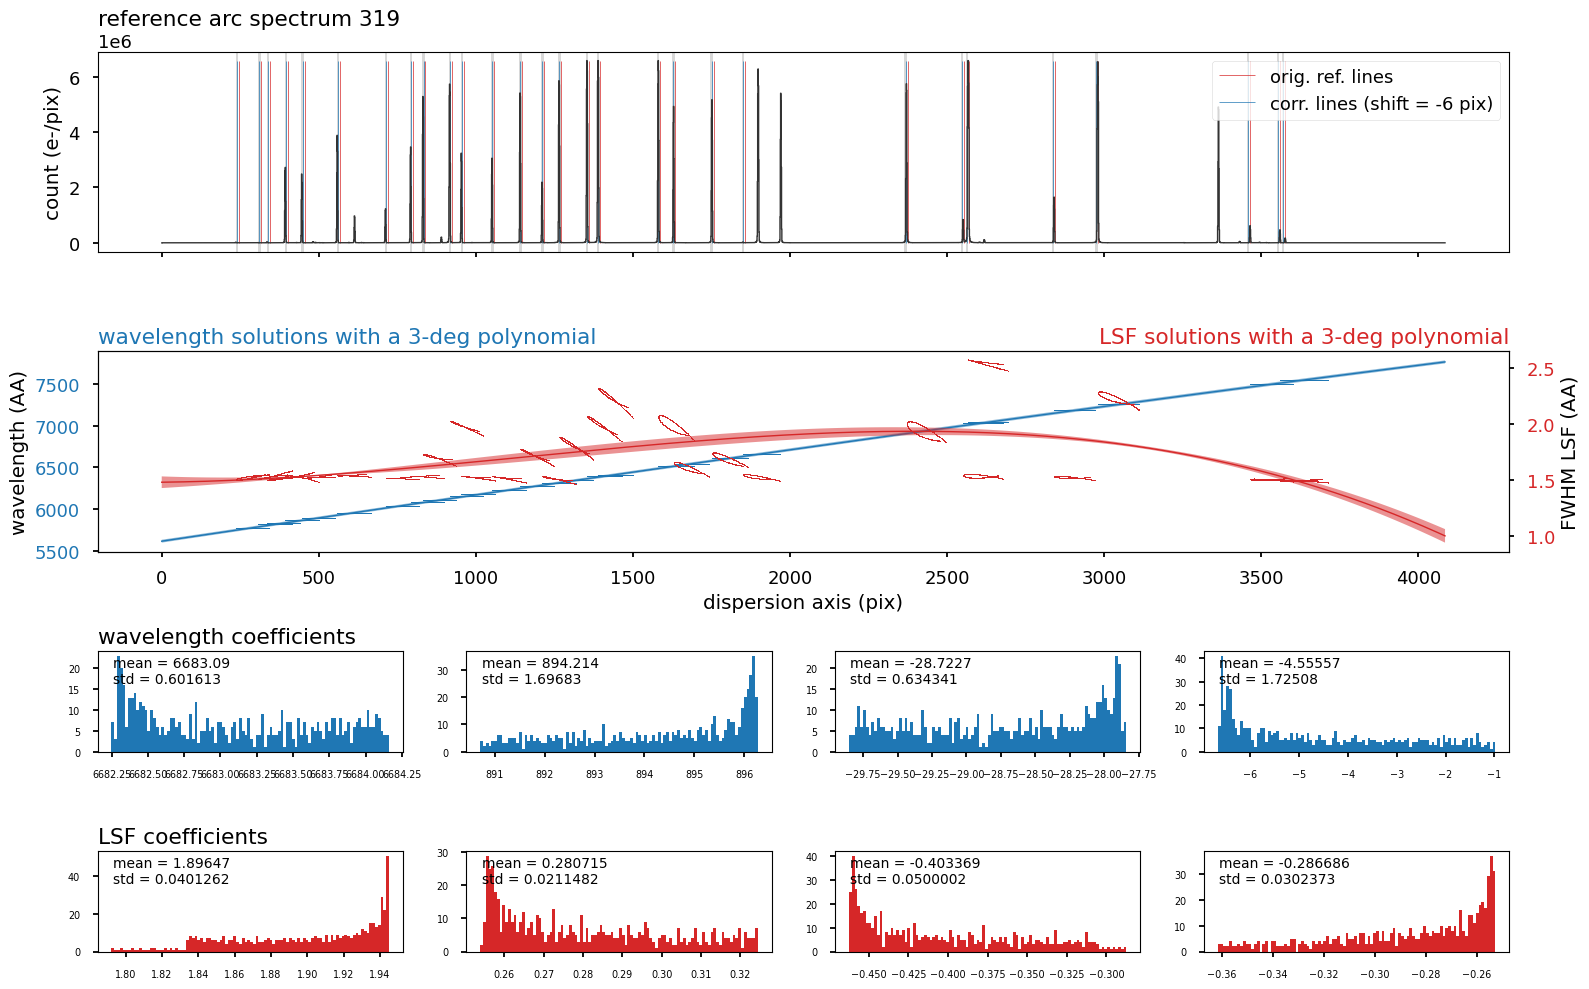

[INFO]: updating header and writing wavelength/LSF to './data/lvm-super-wave-r3-neon.fits' and './data/lvm-super-lsf-r3-neon.fits'
mjd                                    super
kind                                    xarc
camera                                    z1
lamps                                   neon
path      ./data/lvm-super-xarc-z1-neon.fits
Name: 1, dtype: object
[INFO]: reading guess lines from '../../python/lvmdrp/etc/lvm-neon_nist_z1.txt'
[INFO]: going to use fiber 319 as reference
[INFO]: number of guess lines in file 29 percentage masked  17.2414 %
[INFO]: going to use 24 guess lines
[INFO]: reading arc from './data/lvm-super-xarc-z1-neon.fits'
[INFO]: calculating shift in guess lines using CC
[INFO]: maximum CC shift = 1 pix
[INFO]: measuring arc lines for each fiber from reference fiber 319, flux_min = 10.0, fwhm_max = 5.0 and relative flux limits [0.001, 100.0]


measuring arc lines upwards from ref_fiber = 319: 100%|#################################################| 319/319 [00:12<00:00, 25.36fiber/s]
measuring arc lines downwards from ref_fiber = 319: 100%|###############################################| 318/318 [00:14<00:00, 21.35fiber/s]


[INFO]: smoothing FWHM of guess lines along cross-dispersion axis using 3-deg polynomials
[INFO]: fitting wavelength solutions using 3-deg polynomials
[INFO]: finished wavelength fitting with median RMS = 0.23819 AA (0.394073 pix)
[INFO]: fitting LSF solutions using 3-deg polynomials
[INFO]: finished LSF fitting with median RMS = 0.139779 AA (0.231223 pix)


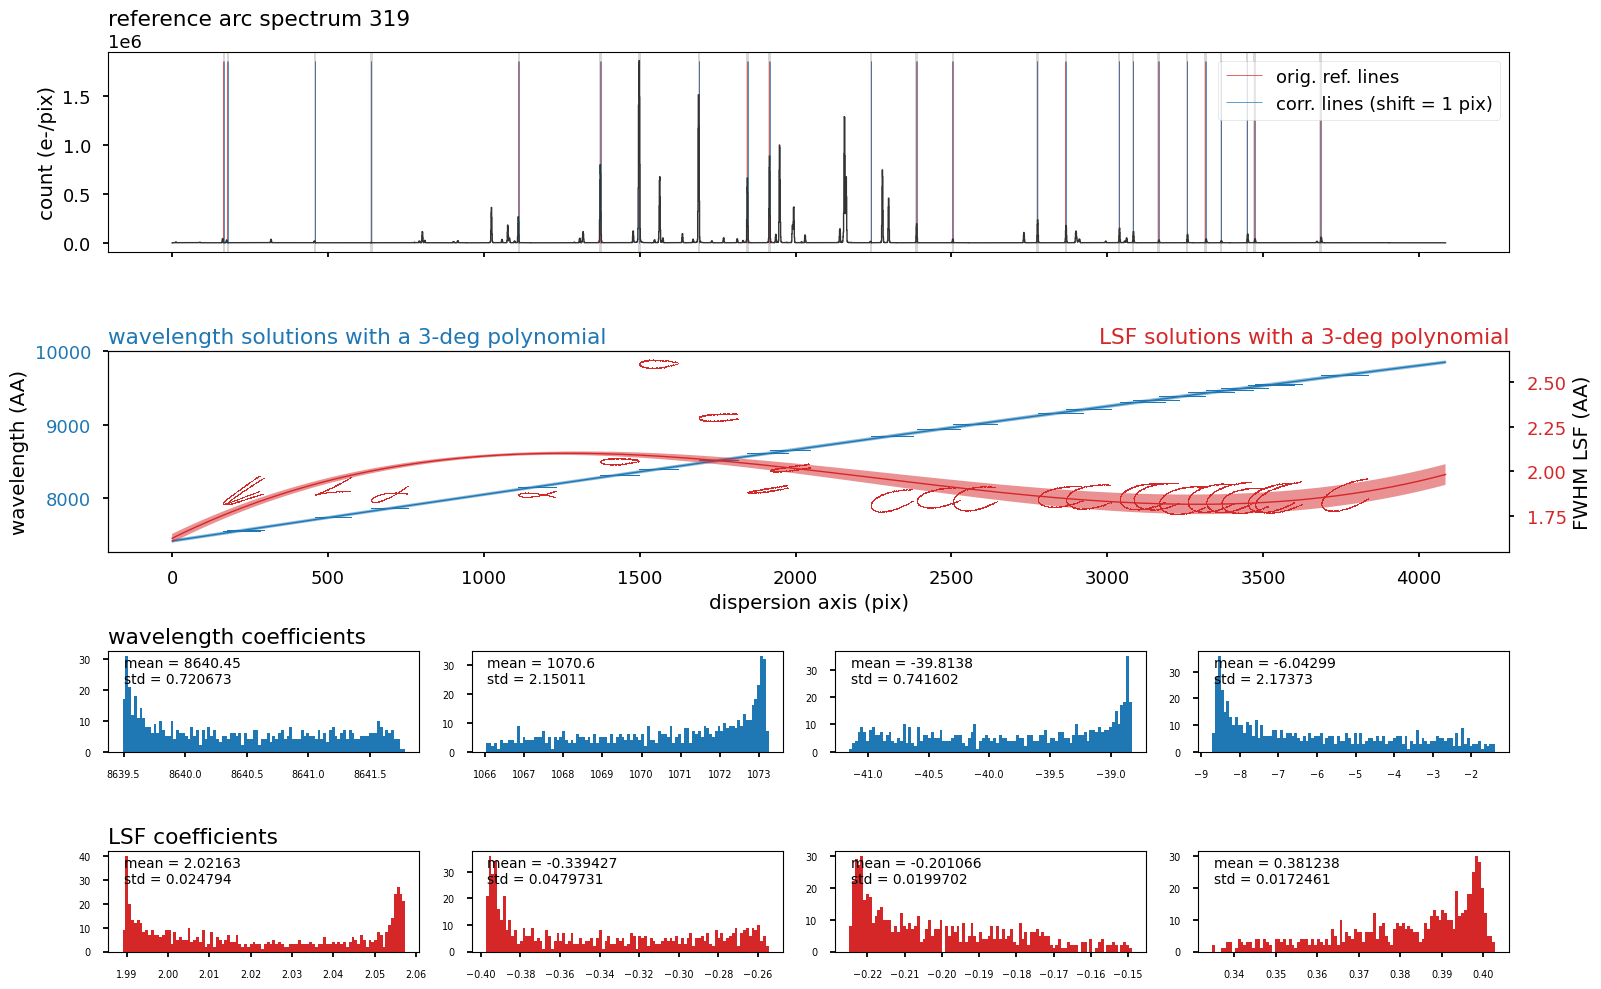

[INFO]: updating header and writing wavelength/LSF to './data/lvm-super-wave-z1-neon.fits' and './data/lvm-super-lsf-z1-neon.fits'
mjd                                    super
kind                                    xarc
camera                                    z2
lamps                                   neon
path      ./data/lvm-super-xarc-z2-neon.fits
Name: 7, dtype: object
[INFO]: reading guess lines from '../../python/lvmdrp/etc/lvm-neon_nist_z1.txt'
[INFO]: going to use fiber 319 as reference
[INFO]: number of guess lines in file 29 percentage masked  17.2414 %
[INFO]: going to use 24 guess lines
[INFO]: reading arc from './data/lvm-super-xarc-z2-neon.fits'
[INFO]: calculating shift in guess lines using CC
[INFO]: maximum CC shift = 9 pix
[INFO]: measuring arc lines for each fiber from reference fiber 319, flux_min = 10.0, fwhm_max = 5.0 and relative flux limits [0.001, 100.0]


measuring arc lines upwards from ref_fiber = 319: 100%|#################################################| 319/319 [00:13<00:00, 24.24fiber/s]
measuring arc lines downwards from ref_fiber = 319: 100%|###############################################| 318/318 [00:12<00:00, 26.01fiber/s]


[INFO]: smoothing FWHM of guess lines along cross-dispersion axis using 3-deg polynomials
[INFO]: fitting wavelength solutions using 3-deg polynomials
[INFO]: finished wavelength fitting with median RMS = 0.233684 AA (0.386333 pix)
[INFO]: fitting LSF solutions using 3-deg polynomials
[INFO]: finished LSF fitting with median RMS = 0.0323481 AA (0.0534848 pix)


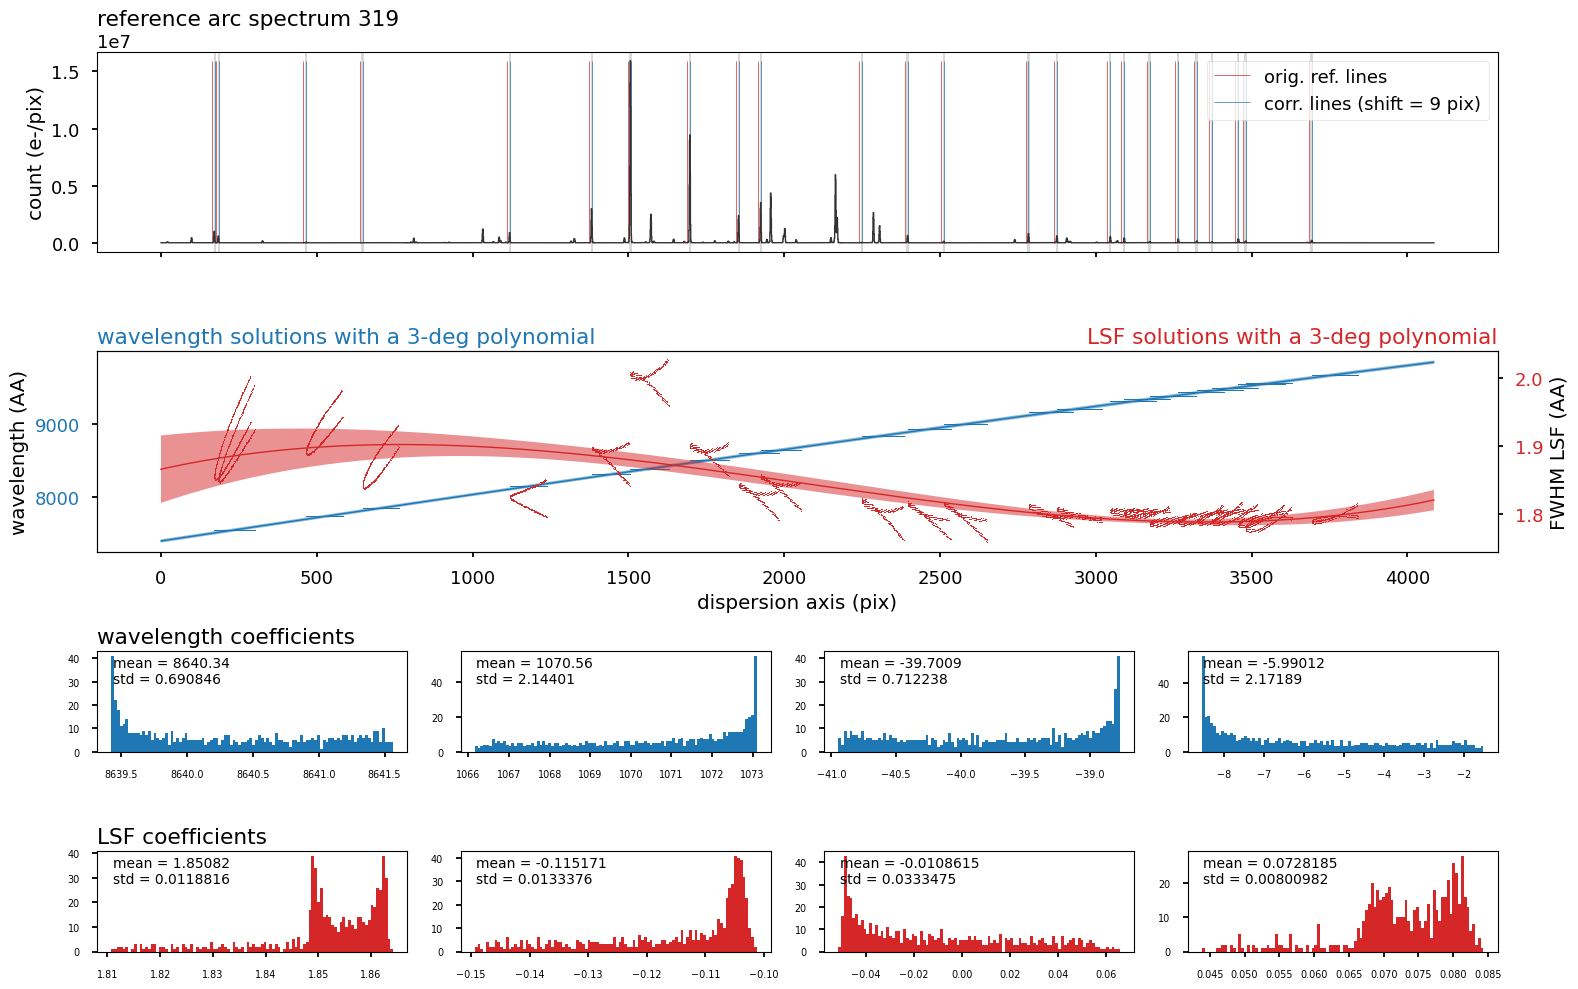

[INFO]: updating header and writing wavelength/LSF to './data/lvm-super-wave-z2-neon.fits' and './data/lvm-super-lsf-z2-neon.fits'
mjd                                    super
kind                                    xarc
camera                                    z3
lamps                                   neon
path      ./data/lvm-super-xarc-z3-neon.fits
Name: 5, dtype: object
[INFO]: reading guess lines from '../../python/lvmdrp/etc/lvm-neon_nist_z1.txt'
[INFO]: going to use fiber 319 as reference
[INFO]: number of guess lines in file 29 percentage masked  17.2414 %
[INFO]: going to use 24 guess lines
[INFO]: reading arc from './data/lvm-super-xarc-z3-neon.fits'
[INFO]: calculating shift in guess lines using CC
[INFO]: maximum CC shift = -15 pix
[INFO]: measuring arc lines for each fiber from reference fiber 319, flux_min = 10.0, fwhm_max = 5.0 and relative flux limits [0.001, 100.0]


measuring arc lines upwards from ref_fiber = 319: 100%|#################################################| 319/319 [00:15<00:00, 20.19fiber/s]
measuring arc lines downwards from ref_fiber = 319: 100%|###############################################| 318/318 [00:13<00:00, 24.06fiber/s]


[INFO]: smoothing FWHM of guess lines along cross-dispersion axis using 3-deg polynomials
[INFO]: fitting wavelength solutions using 3-deg polynomials
[INFO]: finished wavelength fitting with median RMS = 1.24686 AA (2.0733 pix)
[INFO]: fitting LSF solutions using 3-deg polynomials
[INFO]: finished LSF fitting with median RMS = 0.0293413 AA (0.049435 pix)


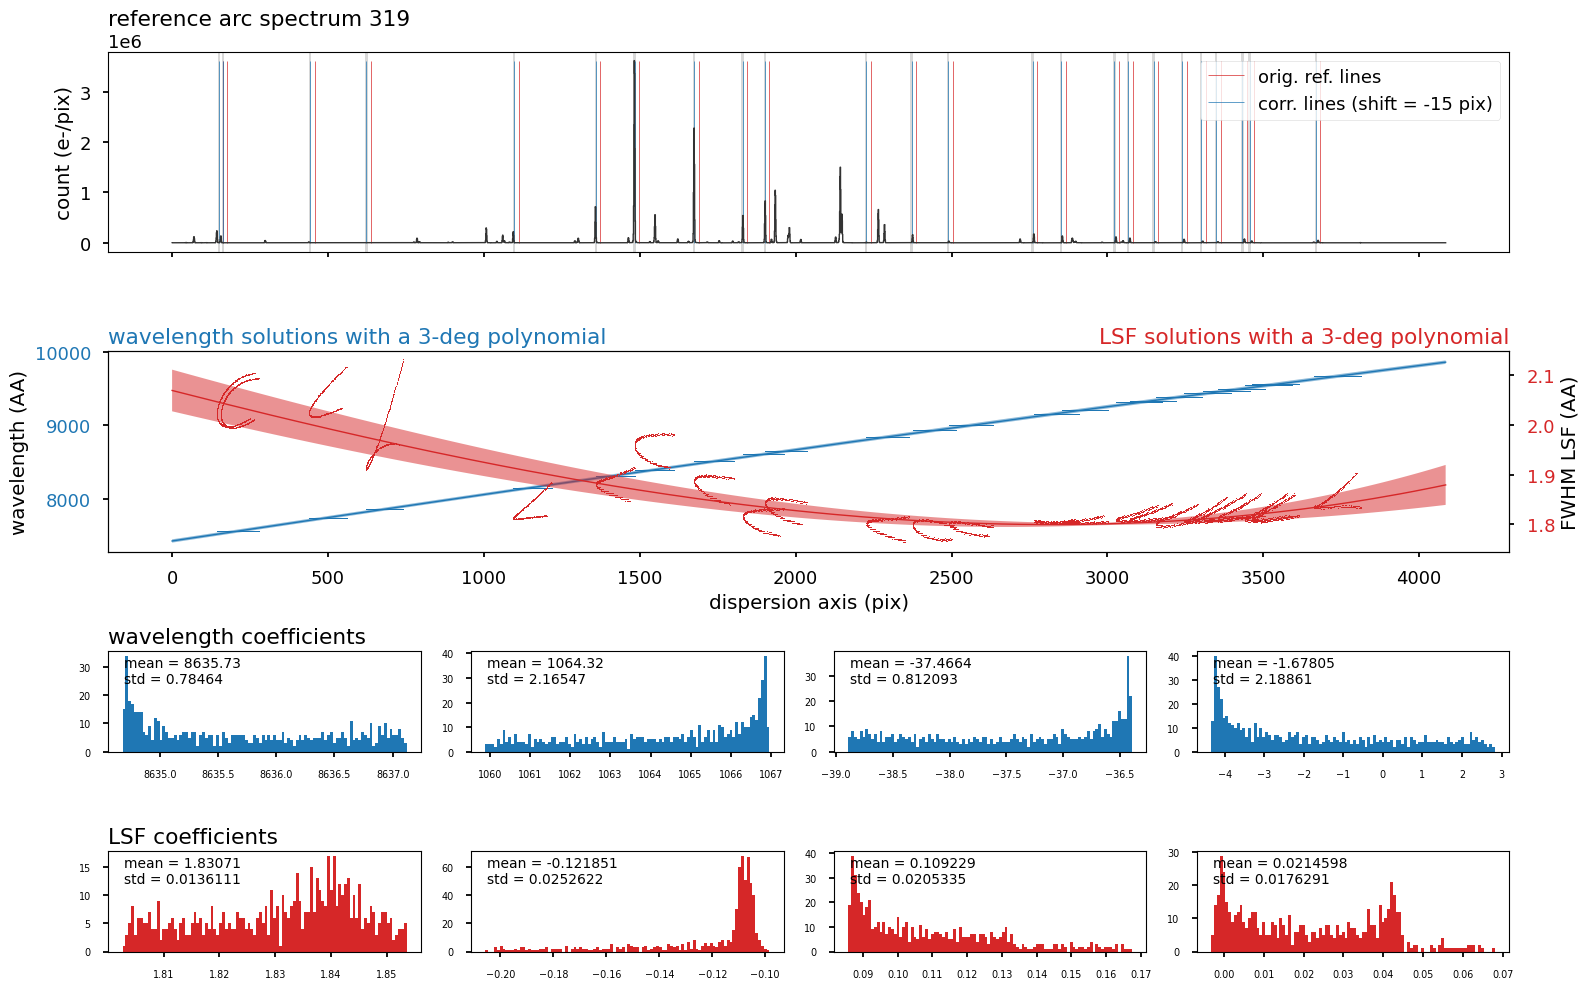

[INFO]: updating header and writing wavelength/LSF to './data/lvm-super-wave-z3-neon.fits' and './data/lvm-super-lsf-z3-neon.fits'


In [4]:
CHANNEL_WL = {"b": (3600, 5930), "r": (5660, 7720), "z": (7470, 9800)}
LAMPS = "neon"
REF_FIBER = 319

masters_arc = get_masters_metadata(path_pattern=out_arc_path, mjd="super", kind="xarc", lamps=LAMPS).sort_values("camera")
print(masters_arc.to_string())

for _, marc in masters_arc.iterrows():
    print(marc)

    try:
        rssMethod.detWaveSolution_drp(
            in_arc=marc.path,
            out_wave=out_arc_path.format(mjd=marc.mjd, kind="wave", camera=marc.camera, lamps=marc.lamps),
            out_lsf=out_arc_path.format(mjd=marc.mjd, kind="lsf", camera=marc.camera, lamps=marc.lamps),
            in_ref_lines=f"../../python/lvmdrp/etc/lvm-{LAMPS}_nist_{marc.camera[0]}1.txt",
            ref_fiber=REF_FIBER, poly_disp=3, poly_fwhm=3, poly_cros=3, poly_kinds="poly,poly,poly",
            flux_min="10.0", fwhm_max="5.0", rel_flux_limits="0.001,100", aperture=10, plot=1
        )
        rssMethod.createPixTable_drp(
            in_rss=out_arc_path.format(mjd=marc.mjd, kind="xarc", camera=marc.camera, lamps=marc.lamps),
            out_rss=out_arc_path.format(mjd=marc.mjd, kind="warc", camera=marc.camera, lamps=marc.lamps),
            arc_wave=out_arc_path.format(mjd=marc.mjd, kind="wave", camera=marc.camera, lamps=marc.lamps),
            arc_fwhm=out_arc_path.format(mjd=marc.mjd, kind="lsf", camera=marc.camera, lamps=marc.lamps)
        )
        wave_range = CHANNEL_WL[marc.camera[0]]
        rssMethod.resampleWave_drp(
            in_rss=out_arc_path.format(mjd=marc.mjd, kind="warc", camera=marc.camera, lamps=marc.lamps),
            out_rss=out_arc_path.format(mjd=marc.mjd, kind="harc", camera=marc.camera, lamps=marc.lamps),
            start_wave=wave_range[0], end_wave=wave_range[1], disp_pix=1.0, method="linear",
            err_sim=10, parallel="auto", extrapolate=True
        )
    except Exception as e:
        rssMethod.rss_logger.error(e)